<a href="https://colab.research.google.com/github/lindenalex/Qiskit_advanced_tutorials/blob/main/onestep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numeryczne Rozwiązywanie Rónań Różniczkowych Zwyczajnych
### Uniwersytet Jagielloński 2023
Katedra Teorii Optymalizacji i Sterowania UJ

In [20]:
import numpy as np
import matplotlib.pyplot as plt

## Rozwiązania

## Przypadek testowy
Proszę zaimplementować fukcję kwadratową i porónać rozwiązanie dokładne z numerycznym

In [21]:
def open_euler(f, x0, t0, T, h):
    x0 = np.asarray(x0, dtype=float)
    if T < t0:
        raise ValueError("Final time T must be >= initial time t0.")
    if h <= 0:
        raise ValueError("Step size h must be positive.")

    t = t0
    x = x0
    t_list = [t]
    x_list = [x]

    while t < T:
        h_eff = h if t + h <= T else T - t
        k1 = np.asarray(f(t, x), dtype=float)
        x = x + h_eff * k1
        t = t + h_eff
        t_list.append(t)
        x_list.append(x)

    return np.array(t_list, dtype=float), np.stack(x_list, axis=0)


def heun(f, x0, t0, T, h):
    x0 = np.asarray(x0, dtype=float)
    if T < t0:
        raise ValueError("Final time T must be >= initial time t0.")
    if h <= 0:
        raise ValueError("Step size h must be positive.")

    t = t0
    x = x0
    t_list = [t]
    x_list = [x]

    while t < T:
        h_eff = h if t + h <= T else T - t
        k1 = np.asarray(f(t, x), dtype=float)
        x_pred = x + h_eff * k1
        k2 = np.asarray(f(t + h_eff, x_pred), dtype=float)
        x = x + (h_eff / 2) * (k1 + k2)
        t = t + h_eff
        t_list.append(t)
        x_list.append(x)

    return np.array(t_list, dtype=float), np.stack(x_list, axis=0)


def modified_euler(f, x0, t0, T, h):
    x0 = np.asarray(x0, dtype=float)
    if T < t0:
        raise ValueError("Final time T must be >= initial time t0.")
    if h <= 0:
        raise ValueError("Step size h must be positive.")

    t = t0
    x = x0
    t_list = [t]
    x_list = [x]

    while t < T:
        h_eff = h if t + h <= T else T - t
        k1 = np.asarray(f(t, x), dtype=float)
        x_mid = x + (h_eff / 2) * k1
        k2 = np.asarray(f(t + h_eff / 2, x_mid), dtype=float)
        x = x + h_eff * k2
        t = t + h_eff
        t_list.append(t)
        x_list.append(x)

    return np.array(t_list, dtype=float), np.stack(x_list, axis=0)


def rk4(f, x0, t0, T, h):
    x0 = np.asarray(x0, dtype=float)
    if T < t0:
        raise ValueError("Final time T must be >= initial time t0.")
    if h <= 0:
        raise ValueError("Step size h must be positive.")

    t = t0
    x = x0
    t_list = [t]
    x_list = [x]

    while t < T:
        h_eff = h if t + h <= T else T - t
        k1 = np.asarray(f(t, x), dtype=float)
        k2 = np.asarray(f(t + h_eff/2, x + (h_eff/2) * k1), dtype=float)
        k3 = np.asarray(f(t + h_eff/2, x + (h_eff/2) * k2), dtype=float)
        k4 = np.asarray(f(t + h_eff,   x + h_eff * k3), dtype=float)
        x = x + (h_eff / 6) * (k1 + 2*k2 + 2*k3 + k4)
        t = t + h_eff
        t_list.append(t)
        x_list.append(x)

    return np.array(t_list, dtype=float), np.stack(x_list, axis=0)


In [22]:
def f(t, x):
    return 2 * t

def exact(t):
    return np.asarray(t, dtype=float)**2

ValueError: x and y must have same first dimension, but have shapes (101,) and (12,)

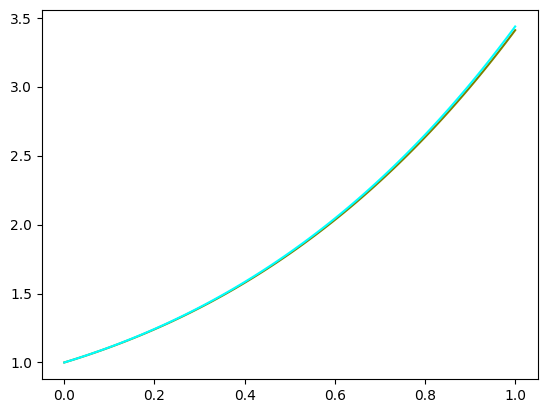

In [23]:
plt.figure()
plt.plot(t_e, x_euler,    color="olive",  label="Euler")
plt.plot(t_h, x_heun,      color="cyan",   label="Heun")
plt.plot(t_m, x_mod,       color="pink",   label="Modified Euler")
plt.plot(t_r, x_rk4,       color="green",  label="RK4")
plt.plot(t_e, exact(t_e),  color="red",    label="Exact $t^2$")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Test case")
plt.legend()
plt.grid(True)
plt.show()

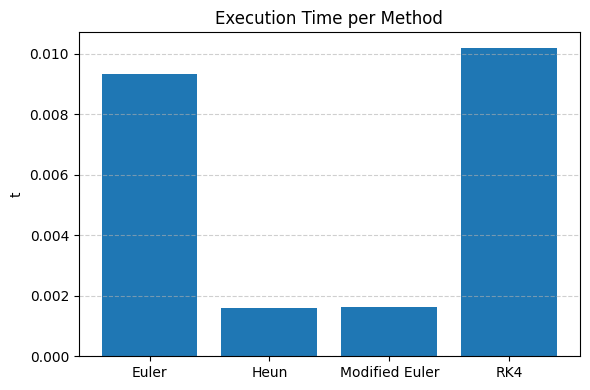

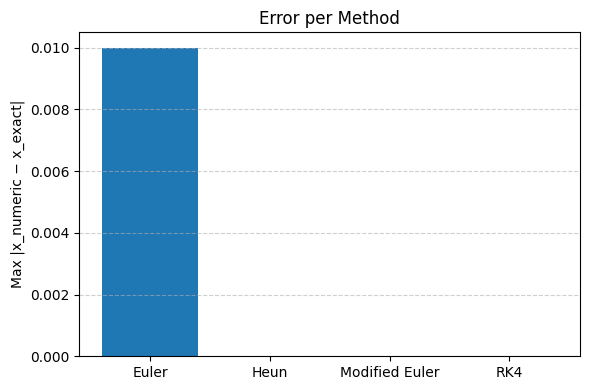

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt

t0, x0, T, h = 0.0, exact(0.0), 1.0, 0.01


times = {}
start = time.perf_counter()
t_e, x_euler = open_euler(f, x0, t0, T, h)
times['Euler'] = time.perf_counter() - start

start = time.perf_counter()
t_h, x_heun = heun(f, x0, t0, T, h)
times['Heun'] = time.perf_counter() - start

start = time.perf_counter()
t_m, x_modified = modified_euler(f, x0, t0, T, h)
times['Modified Euler'] = time.perf_counter() - start

start = time.perf_counter()
t_r, x_rk4 = rk4(f, x0, t0, T, h)
times['RK4'] = time.perf_counter() - start

errors = {
    'Euler':           np.max(np.abs(x_euler    - exact(t_e))),
    'Heun':            np.max(np.abs(x_heun     - exact(t_h))),
    'Modified Euler':  np.max(np.abs(x_modified - exact(t_m))),
    'RK4':             np.max(np.abs(x_rk4      - exact(t_r))),
}

plt.figure(figsize=(6,4))
plt.bar(times.keys(), times.values())
plt.ylabel("t")
plt.title("Execution Time per Method")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.bar(errors.keys(), errors.values())
plt.ylabel("Max |x_numeric − x_exact|")
plt.title("Error per Method")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Zagadnienie 1

In [5]:
import math

x0 = 1.
t0 = 0.
T = 1
n = 100
h = 0.1


def exact(t):
    return 2 * math.e ** t - t - 1

def f(t, x):
    return t + x

In [6]:
t_e, x_euler    = open_euler   (f, x0, t0, T, h)
t_h, x_heun     = heun         (f, x0, t0, T, h)
t_m, x_mod      = modified_euler(f, x0, t0, T, h)
t_r, x_rk4      = rk4          (f, x0, t0, T, h)

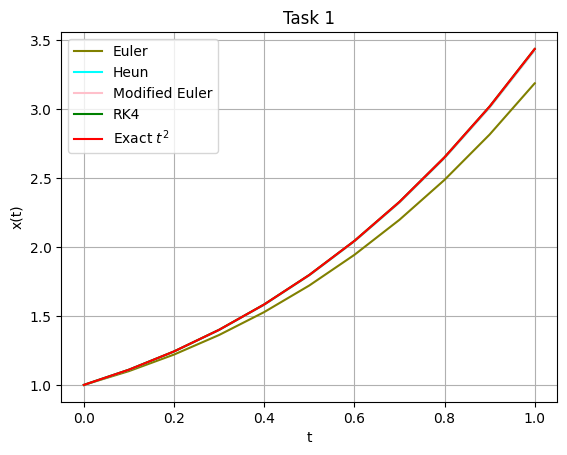

In [7]:
plt.figure()
plt.plot(t_e, x_euler,    color="olive",  label="Euler")
plt.plot(t_h, x_heun,      color="cyan",   label="Heun")
plt.plot(t_m, x_mod,       color="pink",   label="Modified Euler")
plt.plot(t_r, x_rk4,       color="green",  label="RK4")
plt.plot(t_e, exact(t_e),  color="red",    label="Exact $t^2$")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Task 1")
plt.legend()
plt.grid(True)
plt.show()

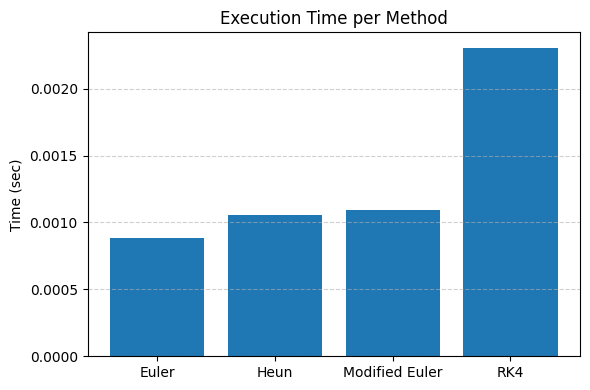

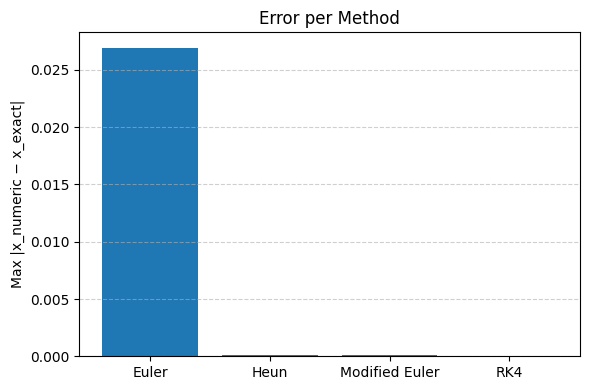

In [8]:
t0, x0, T, h = 0.0, exact(0.0), 1.0, 0.01


times = {}
start = time.perf_counter()
t_e, x_euler = open_euler(f, x0, t0, T, h)
times['Euler'] = time.perf_counter() - start

start = time.perf_counter()
t_h, x_heun = heun(f, x0, t0, T, h)
times['Heun'] = time.perf_counter() - start

start = time.perf_counter()
t_m, x_modified = modified_euler(f, x0, t0, T, h)
times['Modified Euler'] = time.perf_counter() - start

start = time.perf_counter()
t_r, x_rk4 = rk4(f, x0, t0, T, h)
times['RK4'] = time.perf_counter() - start

errors = {
    'Euler':           np.max(np.abs(x_euler    - exact(t_e))),
    'Heun':            np.max(np.abs(x_heun     - exact(t_h))),
    'Modified Euler':  np.max(np.abs(x_modified - exact(t_m))),
    'RK4':             np.max(np.abs(x_rk4      - exact(t_r))),
}

plt.figure(figsize=(6,4))
plt.bar(times.keys(), times.values())
plt.ylabel("Time (sec)")
plt.title("Execution Time per Method")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.bar(errors.keys(), errors.values())
plt.ylabel("Max |x_numeric − x_exact|")
plt.title("Error per Method")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


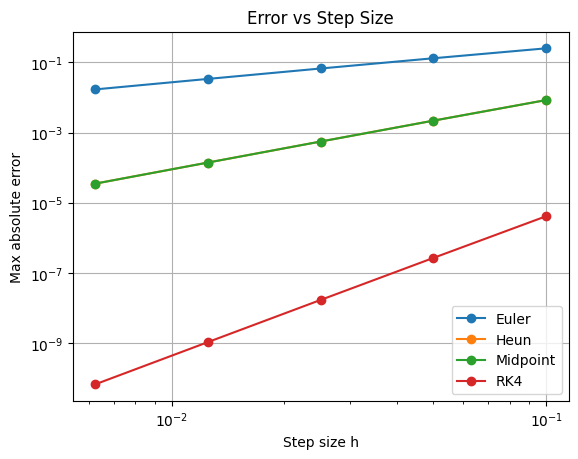

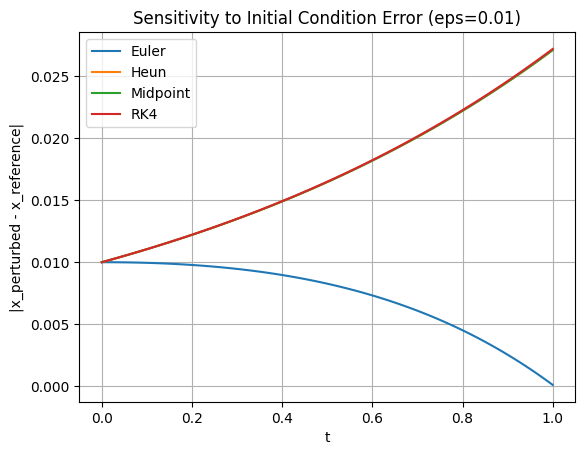

In [10]:
h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625]
methods = {
    'Euler': open_euler,
    'Heun': heun,
    'Midpoint': modified_euler,
    'RK4': rk4,
}
error_data = {name: [] for name in methods}

for h in h_values:
    for name, method in methods.items():
        t, x_num = method(f, 1.0, 0.0, 1.0, h)
        err = np.max(np.abs(x_num - exact(t)))
        error_data[name].append(err)

plt.figure()
for name, errors in error_data.items():
    plt.loglog(h_values, errors, marker='o', label=name)
plt.xlabel('Step size h')
plt.ylabel('Max absolute error')
plt.title('Error vs Step Size')
plt.legend()
plt.grid(True)
plt.show()


eps = 1e-2
h = 0.01
t_ref, x_ref = rk4(f, 1.0, 0.0, 1.0, h)
perturbation_errors = {}

for name, method in methods.items():
    _, x_pert = method(f, 1.0 + eps, 0.0, 1.0, h)
    perturbation_errors[name] = np.abs(x_pert - x_ref)

plt.figure()
for name, diff in perturbation_errors.items():
    plt.plot(t_ref, diff, label=name)
plt.xlabel('t')
plt.ylabel('|x_perturbed - x_reference|')
plt.title('Sensitivity to Initial Condition Error (eps=0.01)')
plt.legend()
plt.grid(True)
plt.show()


## Zagadnienie 2

In [95]:
import math

x0 = 1.
t0 = 0.
T = 1
n = 100

def exact(t):
    return 1 / (1 + t)

def f(t, x):
    return -x**2

In [96]:
t_e, x_euler    = open_euler   (f, x0, t0, T, h)
t_h, x_heun     = heun         (f, x0, t0, T, h)
t_m, x_mod      = modified_euler(f, x0, t0, T, h)
t_r, x_rk4      = rk4          (f, x0, t0, T, h)

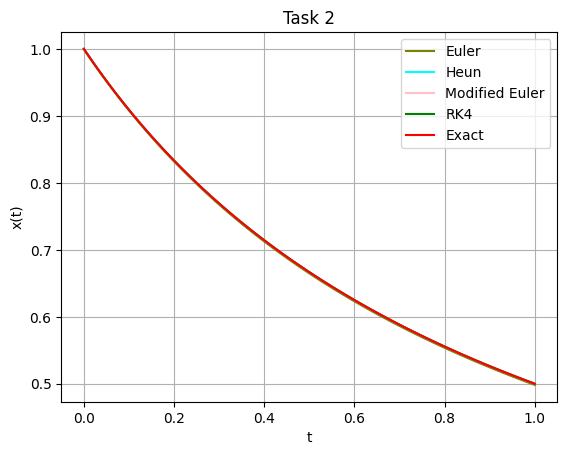

In [102]:
plt.figure()
plt.plot(t_e, x_euler,    color="olive",  label="Euler")
plt.plot(t_h, x_heun,      color="cyan",   label="Heun")
plt.plot(t_m, x_mod,       color="pink",   label="Modified Euler")
plt.plot(t_r, x_rk4,       color="green",  label="RK4")
plt.plot(t_e, exact(t_e),  color="red",    label="Exact")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Task 2")
plt.legend()
plt.grid(True)
plt.show()

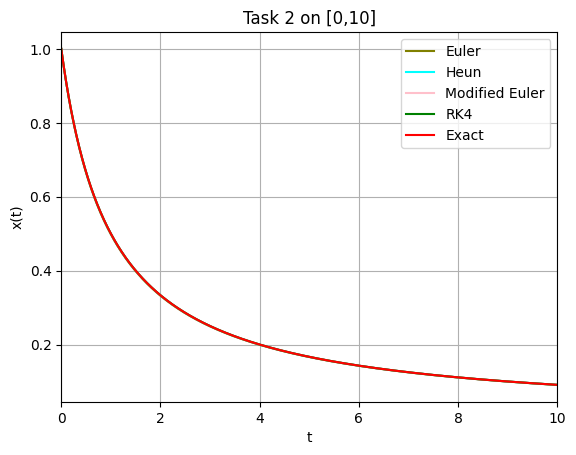

In [107]:
t0 = 0.0
T  = 5
x0 = exact(t0)

t_e, x_euler    = open_euler   (f, x0, t0, T, h)
t_h, x_heun     = heun         (f, x0, t0, T, h)
t_m, x_mod      = modified_euler(f, x0, t0, T, h)
t_r, x_rk4      = rk4          (f, x0, t0, T, h)

plt.figure()
plt.plot(t_e, x_euler,    color="olive",  label="Euler")
plt.plot(t_h, x_heun,     color="cyan",   label="Heun")
plt.plot(t_m, x_mod,      color="pink",   label="Modified Euler")
plt.plot(t_r, x_rk4,      color="green",  label="RK4")
plt.plot(t_e, exact(t_e), color="red",    label="Exact")
plt.xlim(0, 10)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Task 2 on [0,10]")
plt.legend()
plt.grid(True)
plt.show()


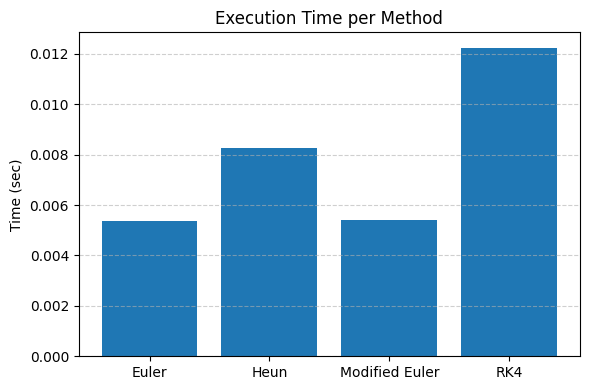

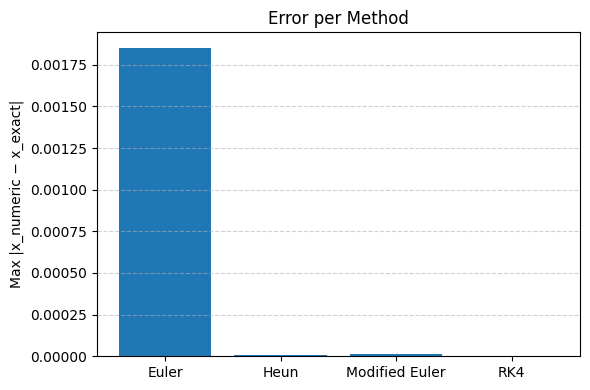

In [108]:
import time


times = {}
start = time.perf_counter()
t_e, x_euler = open_euler(f, x0, t0, T, h)
times['Euler'] = time.perf_counter() - start

start = time.perf_counter()
t_h, x_heun = heun(f, x0, t0, T, h)
times['Heun'] = time.perf_counter() - start

start = time.perf_counter()
t_m, x_modified = modified_euler(f, x0, t0, T, h)
times['Modified Euler'] = time.perf_counter() - start

start = time.perf_counter()
t_r, x_rk4 = rk4(f, x0, t0, T, h)
times['RK4'] = time.perf_counter() - start

errors = {
    'Euler':           np.max(np.abs(x_euler    - exact(t_e))),
    'Heun':            np.max(np.abs(x_heun     - exact(t_h))),
    'Modified Euler':  np.max(np.abs(x_modified - exact(t_m))),
    'RK4':             np.max(np.abs(x_rk4      - exact(t_r))),
}

plt.figure(figsize=(6,4))
plt.bar(times.keys(), times.values())
plt.ylabel("Time (sec)")
plt.title("Execution Time per Method")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.bar(errors.keys(), errors.values())
plt.ylabel("Max |x_numeric − x_exact|")
plt.title("Error per Method")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


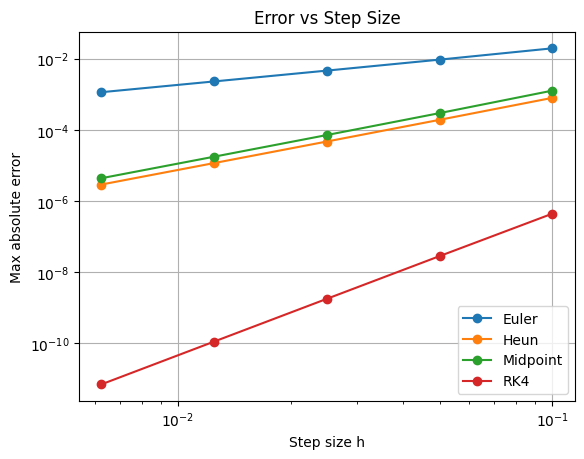

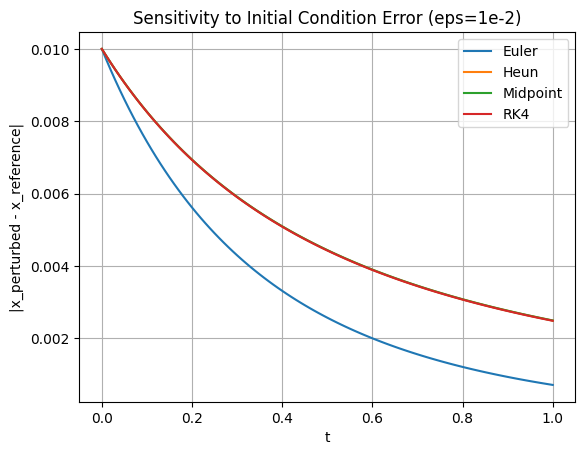

In [109]:
import numpy as np
import matplotlib.pyplot as plt

h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625]
methods = {
    'Euler': open_euler,
    'Heun': heun,
    'Midpoint': modified_euler,
    'RK4': rk4,
}
error_data = {name: [] for name in methods}

for h in h_values:
    for name, method in methods.items():
        t, x_num = method(f, 1.0, 0.0, 1.0, h)
        err = np.max(np.abs(x_num - exact(t)))
        error_data[name].append(err)

plt.figure()
for name, errors in error_data.items():
    plt.loglog(h_values, errors, marker='o', label=name)
plt.xlabel('Step size h')
plt.ylabel('Max absolute error')
plt.title('Error vs Step Size')
plt.legend()
plt.grid(True)
plt.show()

eps = 1e-2
h = 0.01
t_ref, x_ref = rk4(f, 1.0, 0.0, 1.0, h)
perturbation_errors = {}

for name, method in methods.items():
    _, x_pert = method(f, 1.0 + eps, 0.0, 1.0, h)
    perturbation_errors[name] = np.abs(x_pert - x_ref)

plt.figure()
for name, diff in perturbation_errors.items():
    plt.plot(t_ref, diff, label=name)
plt.xlabel('t')
plt.ylabel('|x_perturbed - x_reference|')
plt.title('Sensitivity to Initial Condition Error (eps=1e-2)')
plt.legend()
plt.grid(True)
plt.show()


## Zagadnienie 3

In [110]:
import math

x0 = 0.08
t0 = 1
n = 100
h = 0.01
T = 5

def exact(t):
    return t**2 + 0.4 * t + 0.08

def f(t, x):
    return 5 * (x - t**2)

In [111]:
t_e, x_euler    = open_euler   (f, x0, t0, T, h)
t_h, x_heun     = heun         (f, x0, t0, T, h)
t_m, x_mod      = modified_euler(f, x0, t0, T, h)
t_r, x_rk4      = rk4          (f, x0, t0, T, h)

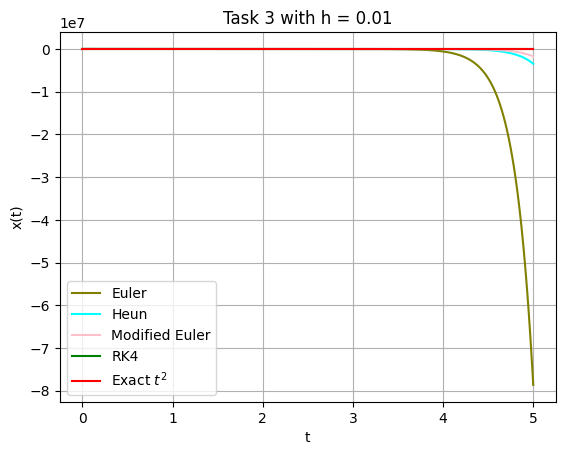

In [116]:
plt.figure()
plt.plot(t_e, x_euler,    color="olive",  label="Euler")
plt.plot(t_h, x_heun,      color="cyan",   label="Heun")
plt.plot(t_m, x_mod,       color="pink",   label="Modified Euler")
plt.plot(t_r, x_rk4,       color="green",  label="RK4")
plt.plot(t_e, exact(t_e),  color="red",    label="Exact $t^2$")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Task 3 with h = 0.01")
plt.legend()
plt.grid(True)
plt.show()

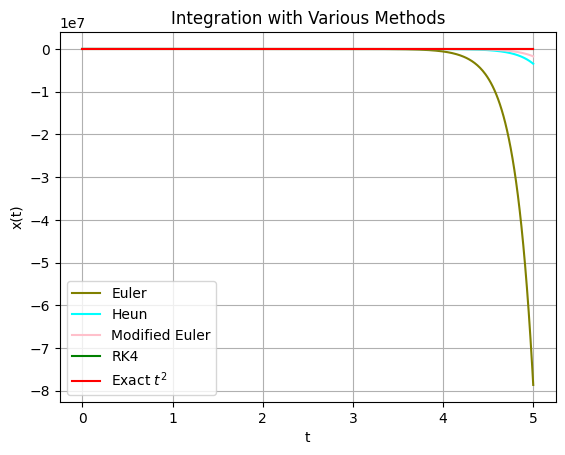

In [115]:
h = 0.01

t_e, x_euler    = open_euler   (f, x0, t0, T, h)
t_h, x_heun     = heun         (f, x0, t0, T, h)
t_m, x_mod      = modified_euler(f, x0, t0, T, h)
t_r, x_rk4      = rk4          (f, x0, t0, T, h)

plt.figure()
plt.plot(t_e, x_euler,    color="olive",  label="Euler")
plt.plot(t_h, x_heun,      color="cyan",   label="Heun")
plt.plot(t_m, x_mod,       color="pink",   label="Modified Euler")
plt.plot(t_r, x_rk4,       color="green",  label="RK4")
plt.plot(t_e, exact(t_e),  color="red",    label="Exact $t^2$")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Task 3 with h = 0.1")
plt.legend()
plt.grid(True)
plt.show()

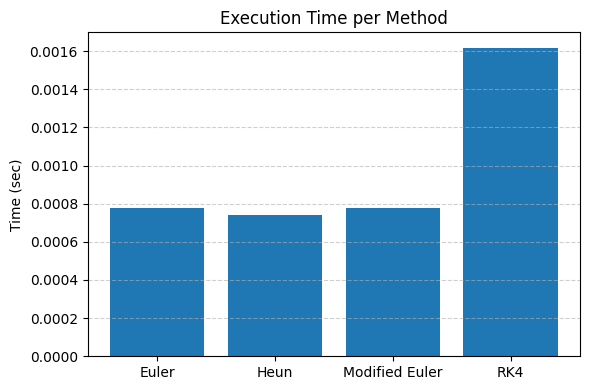

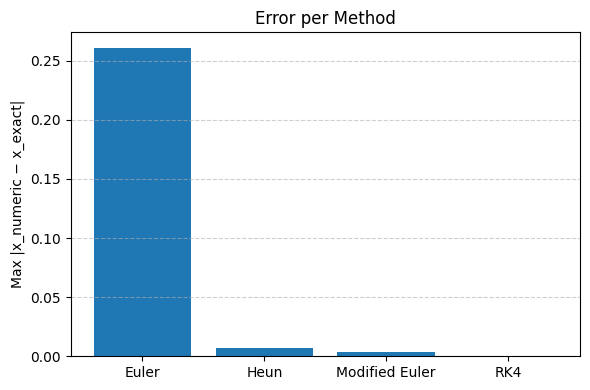

In [78]:
import time
import numpy as np
import matplotlib.pyplot as plt

# (Re-use your already defined integrators and exact function)
# open_euler, heun, modified_euler, rk4, exact

# Parameters
t0, x0, T, h = 0.0, exact(0.0), 1.0, 0.01

# 1) Measure execution times
times = {}
start = time.perf_counter()
t_e, x_euler = open_euler(f, x0, t0, T, h)
times['Euler'] = time.perf_counter() - start

start = time.perf_counter()
t_h, x_heun = heun(f, x0, t0, T, h)
times['Heun'] = time.perf_counter() - start

start = time.perf_counter()
t_m, x_modified = modified_euler(f, x0, t0, T, h)
times['Modified Euler'] = time.perf_counter() - start

start = time.perf_counter()
t_r, x_rk4 = rk4(f, x0, t0, T, h)
times['RK4'] = time.perf_counter() - start

# 2) Compute max absolute errors
errors = {
    'Euler':           np.max(np.abs(x_euler    - exact(t_e))),
    'Heun':            np.max(np.abs(x_heun     - exact(t_h))),
    'Modified Euler':  np.max(np.abs(x_modified - exact(t_m))),
    'RK4':             np.max(np.abs(x_rk4      - exact(t_r))),
}

# 3a) Plot execution times
plt.figure(figsize=(6,4))
plt.bar(times.keys(), times.values())
plt.ylabel("Time (sec)")
plt.title("Execution Time per Method")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3b) Plot max absolute errors
plt.figure(figsize=(6,4))
plt.bar(errors.keys(), errors.values())
plt.ylabel("Max |x_numeric − x_exact|")
plt.title("Error per Method")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


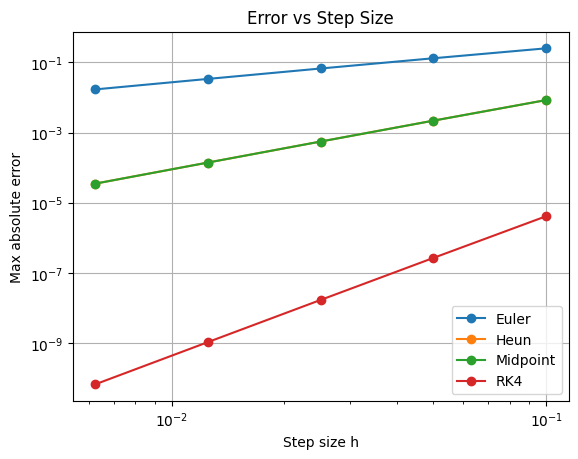

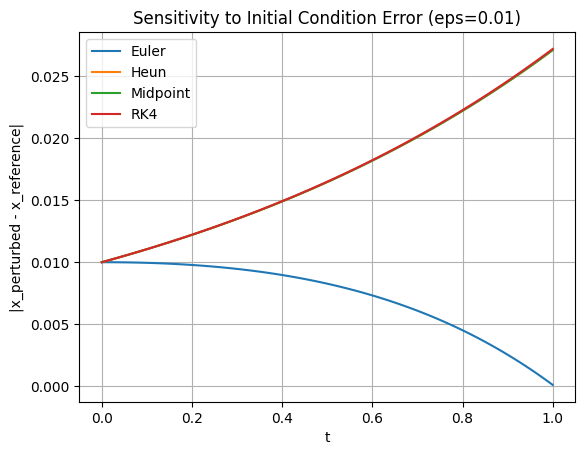

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Error vs. step size
h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625]
methods = {
    'Euler': open_euler,
    'Heun': heun,
    'Midpoint': modified_euler,
    'RK4': rk4,
}
error_data = {name: [] for name in methods}

for h in h_values:
    for name, method in methods.items():
        t, x_num = method(f, 1.0, 0.0, 1.0, h)
        err = np.max(np.abs(x_num - exact(t)))
        error_data[name].append(err)

plt.figure()
for name, errors in error_data.items():
    plt.loglog(h_values, errors, marker='o', label=name)
plt.xlabel('Step size h')
plt.ylabel('Max absolute error')
plt.title('Error vs Step Size')
plt.legend()
plt.grid(True)
plt.show()

# 2) Sensitivity to initial condition error
eps = 1e-2
h = 0.01
t_ref, x_ref = rk4(f, 1.0, 0.0, 1.0, h)  # reference with correct x0
perturbation_errors = {}

for name, method in methods.items():
    _, x_pert = method(f, 1.0 + eps, 0.0, 1.0, h)
    perturbation_errors[name] = np.abs(x_pert - x_ref)

plt.figure()
for name, diff in perturbation_errors.items():
    plt.plot(t_ref, diff, label=name)
plt.xlabel('t')
plt.ylabel('|x_perturbed - x_reference|')
plt.title('Sensitivity to Initial Condition Error (eps=0.01)')
plt.legend()
plt.grid(True)
plt.show()
